# Alunos

| Nome                        | Matrícula |
|-----------------------------|-----------|
| Luiz Filipe Bartelega Penha | 202111082 |
| Vitor Pires Zini            | 202110169 |

# Problema 1

A Empresa de Viacão Aérea Brasileira está estudando a compra de três tipos de aviões:
 Boeing 717 para as pontes aéreas a curta distância, Boeing 737-500 para vôos domésticos e
 internacionais de média distância e MD-11 para vôos internacionais de longa distância. Em
 um estudo preliminar, considerou-se que a capacidade máxima dos aviões a serem comprados
 será sempre preenchida para efeito de planejamento.
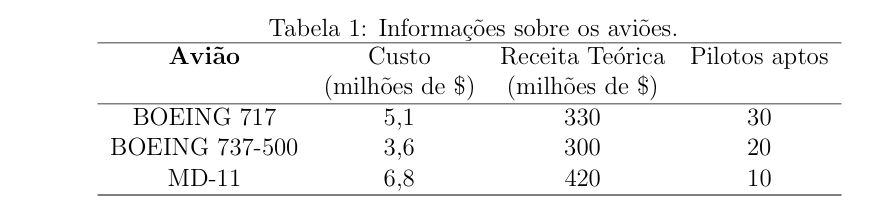

A verba disponível para as compras é de 220 milhões de dólares. Os pilotos de MD-11
 podem pilotar todos os aviões da empresa, mas os demais pilotos só podem ser escalados às
 aeronaves a que foram habilitados. Cada aeronave necessita de dois pilotos para operar. As
 oficinas de manutenção podem suportar até 40 Boeings 717. Um Boeing 737-500 equivale,
 em esforço de manutenção, a 3/4, e um MD-11 a 5/3, quando referidos ao Boeing 717. Apresente
 um modelo que otimize as aquisições de aviões nesta empresa, maximizando as receitas.

# Modelagem matemática

A seguir, apresentaremos a modelagem matemática deste problema, especificando os principais elementos da modelagem de um problema de programação matemática: $(i)$ parâmetros (dados); $(ii)$ variáveis de decisão; $(iii)$ modelagem, composta por uma função objetivo, restrições do problema e restrições de domínio das variáveis de decisão.

## Declaração dos parâmetros

- **(Valores monetários em milhões)**
- custo de um BOEING 717: $\$5,1$;   
- custo de um BOEING 737-500: $\$3,6$;.
- custo de um MD-11: $\$6,8$;
- quantidade de BOEING 717 que podem ser pilotados: $40/2 == 20$
- quantidade de BOEING 737-500 que podem ser pilotados: $30/2 == 15$
- quantidade de MD-11 que podem ser pilotados: $10/2 == 5$
- **Quantidade total de pilotos: $60$**
- **Verba disponível: $\$220$;**
- **receita de um BOEING 717: $\$330$;**
- **receita de um BOEING 737-500: $\$300$;**
- **receita de um MD-11: $\$420$;**

## Variáveis de decisão

* $x \ge 0$: Quantidade de BOEING 717.
* $y \ge 0$: Quantidade de BOEING 737-500.
* $z \ge 0$: Quantidade de MD-11.

## Função objetivo

Consiste na **maximização** da receita da companhia de Viação Aérea, em termos do número de aviões adquiridos.

\begin{equation}
\max f(x,y,z) = 330x + 300y + 420z
\end{equation}

## Restrições

- Restrição 1: O custo de compra dos aviões não pode exceder a verba disponível.
\begin{equation}
5,1x + 3,6y + 6,8z \le 220
\end{equation}

- Restrição 2: O máximo de aviões de cada tipo que podem ser pilotados, dado o número máximo de pilotos aptos a pilotar cada tipo de avião.
\begin{equation}
x \le 20 - z + 5
\end{equation}
\begin{equation}
y \le 15 - z + 5
\end{equation}
\begin{equation}
z \le 5
\end{equation}

- Restrição 3: Já que devem haver 2 pilotos por avião, o máximo de aviões comprados será igual à metade do total de pilotos:

\begin{equation}
x + y + z = 30
\end{equation}

- Retrição 4: Quantidade total de aviões que as oficinas suportam:

\begin{equation}
x + (3̇/4)\cdot\ y + (5/3)\cdot\ z \le 40
\end{equation}

#Resolvendo o Problema

## Instalação da biblioteca PuLP

In [31]:
!pip install pulp
import pulp

## Declaração do objeto que representa o modelo matemático

In [32]:
modelo = pulp.LpProblem('compra_de_avioes', pulp.LpMaximize)

## Variáveis de decisão

In [33]:
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)
z = pulp.LpVariable('z', lowBound=0)

## Função objetivo

In [34]:
modelo += 330*x + 300*y + 420*z

## Restrições

- Restrição 1: O custo de compra dos aviões não pode exceder a verba disponível.

In [35]:
modelo += 5.1*x + 3.6*y + 6.8*z <= 220

- Restrição 2: O máximo de aviões de cada tipo que podem ser pilotados, dado o número máximo de pilotos aptos a pilotar cada tipo de avião.


In [36]:
modelo += x <= 15 - z + 5
modelo += y <= 10 - z + 5
modelo += z <= 5

- Restrição 3: Já que devem haver 2 pilotos por avião, o máximo de aviões comprados será igual à metade do total de pilotos:

In [37]:
modelo += x + y + z == 30

- Retrição 4: Quantidade total de aviões que as oficinas suportam:

In [38]:
modelo += x + 3/4*y + 5/3*z <= 40

### Resolvendo o problema

In [39]:
status = modelo.solve()

## Imprimindo as soluções do problema

In [40]:
print('status: ', pulp.LpStatus[status])
print('funcao objetivo: ', modelo.objective.value())
print('solucoes')
print("\t", 'Boeing 717 (x): ', x.value())
print("\t", 'Boeing 737-500 (y): ', y.value())
print("\t", 'MD-11 (z): ', z.value())

status:  Optimal
funcao objetivo:  10050.0
solucoes
	 Boeing 717 (x):  15.0
	 Boeing 737-500 (y):  10.0
	 MD-11 (z):  5.0
